In [1]:
from sklearn.datasets import fetch_openml

feature, target = fetch_openml("mnist_784",return_X_y=True)

In [2]:
target = target.astype(int)

In [3]:
feature.shape

(70000, 784)

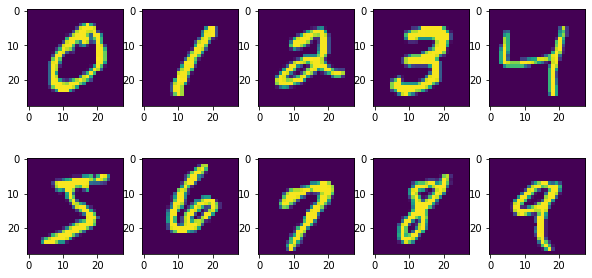

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
for i in range(10):
    subplot = plt.subplot(2,5, i+1)
    subplot.imshow(feature[target==i].values[0].reshape(28,28))
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
feature_compress = pca.fit_transform(feature)

In [6]:
feature_compress.shape

(70000, 331)

In [7]:
import numpy as np

print(np.sum(pca.explained_variance_ratio_))

0.9900550292572762


In [8]:
feature_inverse = pca.inverse_transform(feature_compress)

In [9]:
feature_inverse.shape

(70000, 784)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(feature,feature_inverse))
print(np.sqrt(mean_squared_error(feature,feature_inverse)))

3.153535338680188
6.596129385580093


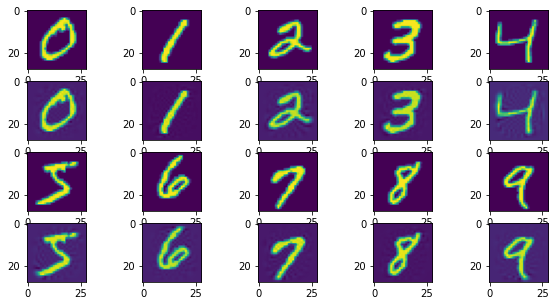

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
for i in range(10):
    index = i//5*5+i+1
    
    subplot = plt.subplot(4,5, index)
    subplot.imshow(feature[target==i].values[0].reshape(28,28))
    subplot = plt.subplot(4,5, index+5)
    subplot.imshow(feature_inverse[target==i][0].reshape(28,28))
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
feature_compress = pca.fit_transform(feature)

In [13]:
import numpy as np

print(np.sum(pca.explained_variance_ratio_))

0.16901560507038377


In [14]:
feature_inverse = pca.inverse_transform(feature_compress)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(feature,feature_inverse))
print(np.sqrt(mean_squared_error(feature,feature_inverse)))

33.31905005123348
60.29535342162397


In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

for rate in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.96,0.97,0.98,0.99]:
    pca = PCA(n_components=rate)
    feature_compress = pca.fit_transform(feature)
    print(rate, feature_compress.shape[1])
    print(np.sum(pca.explained_variance_ratio_))
    feature_inverse = pca.inverse_transform(feature_compress)
    print(mean_absolute_error(feature,feature_inverse))
    print(np.sqrt(mean_squared_error(feature,feature_inverse)))
    print()

0.05 1
0.0974611592249473
35.34586113447204
62.837711708003695

0.1 2
0.1690156050937346
33.31904962330437
60.295353420776806

0.15 2
0.1690156050937346
33.31904962330437
60.295353420776806

0.2 3
0.23051091490096515
31.787533558786148
58.02145868551467

0.25 4
0.28454476018644703
30.600596398959865
55.947237250384184

0.3 5
0.33343409722522593
29.269473962540207
54.00188978003771

0.35 6
0.37648636752552617
28.245809179224302
52.22884088717766

0.4 7
0.4092689827562254
27.457522679317997
50.83727910933214

0.45 9
0.4657490403943522
26.033564938819946
48.345946426567714

0.5 11
0.5102373275908384
24.819379563803796
46.28926149081902

0.55 14
0.564623700878988
23.430214377549504
43.64352321707411

0.6 17
0.6085145572194235
22.16000088611601
41.385215389167755

0.65 21
0.6553671895074865
20.874566811478914
38.829850805483964

0.7 26
0.7013740462472795
19.466979783248664
36.14524608855921

0.75 33
0.7506566429133847
17.831089286613903
33.02830695955668

0.8 43
0.800173487710443
16.0257159